<a href="https://colab.research.google.com/github/DJS-INFOMATRIX/Machine-Learning/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

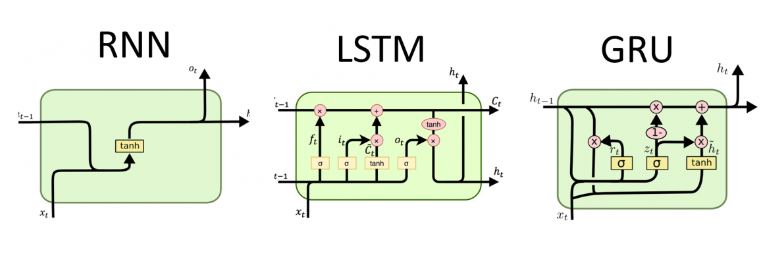

# Recurrent Neural Networks (RNN)

It is the type of neural network which is mainly used for Sequential data. Sequential data is the the data that depends on the order of the data occurring.
Sequential data include time series data, natural language text or speech or any kind of data where the order of the data is important.

Unlike a normal feed forward neural network, RNNs have a memory which store information of what has been processed so far. This makes it such that the output at any time instant is not just dependent on the corresponding input but is also dependent on the memory stored of the previous time instant. This memory is known as the hidden state.

Hi Veer!



**Structure of a RNN**

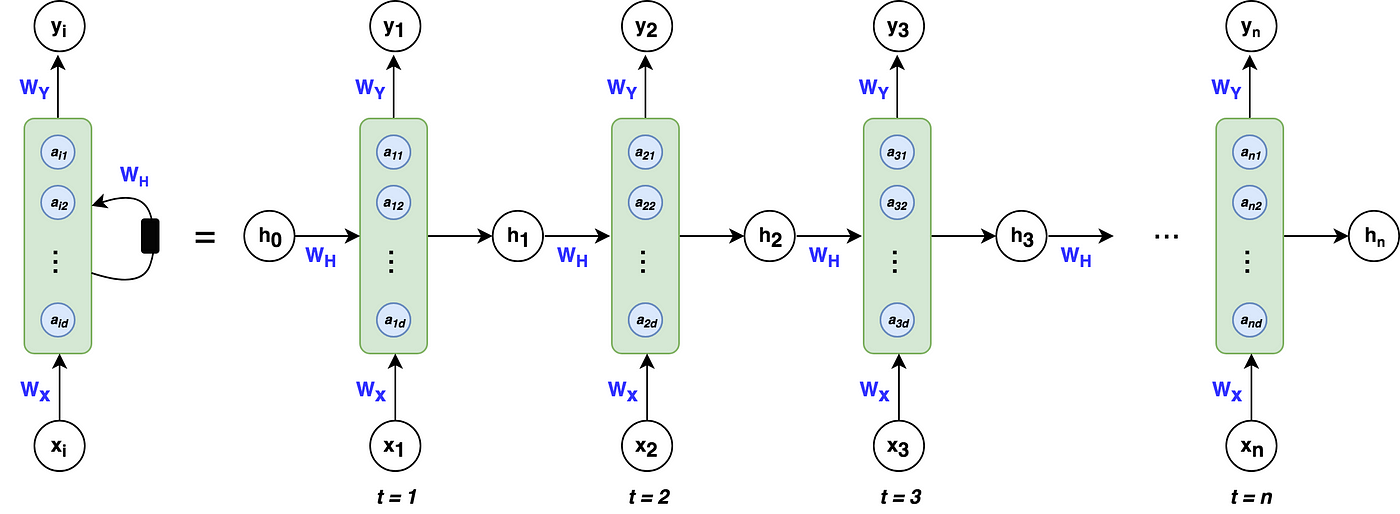

**Types of RNNs**

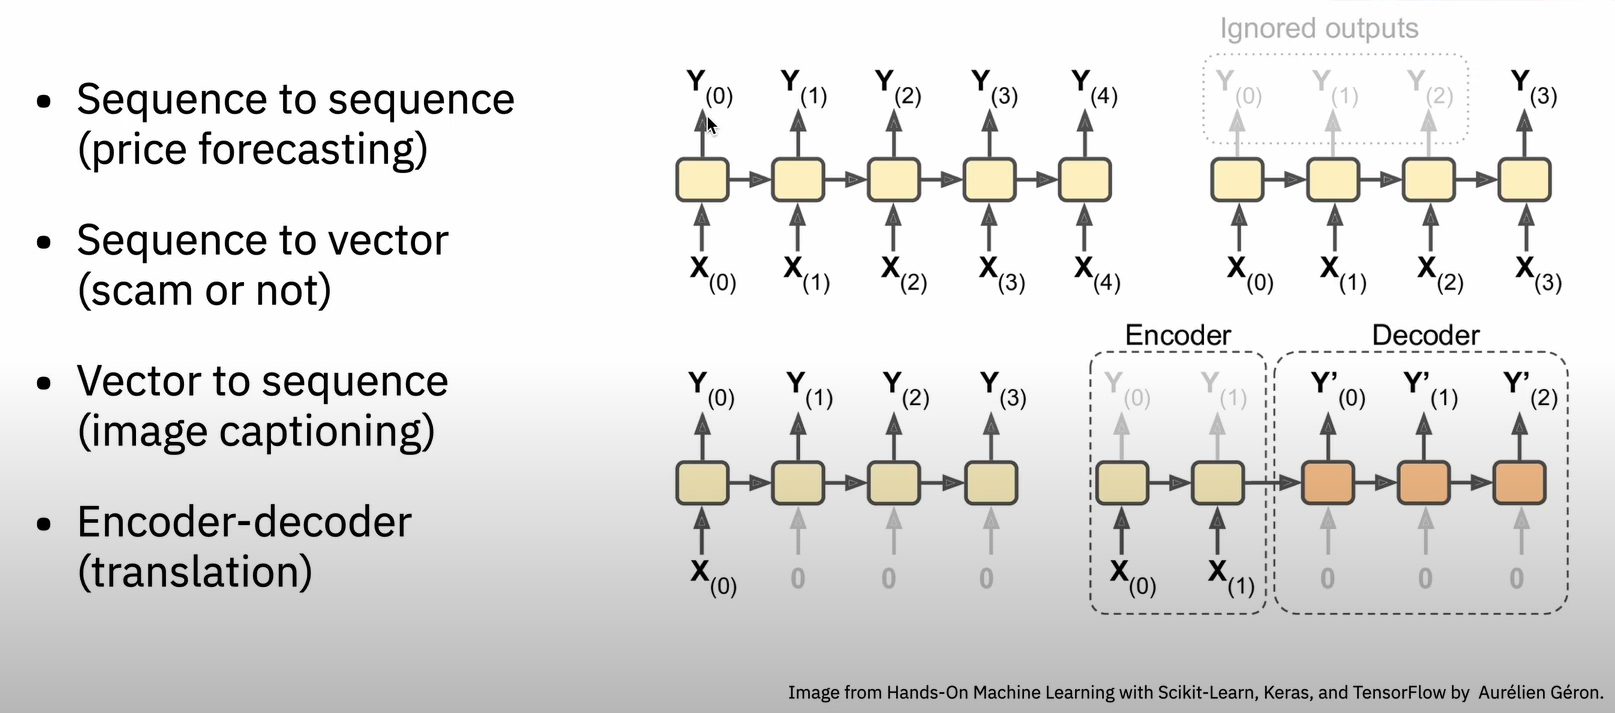

**Sequence to Sequence :** There is input and output at each time instance. This type of RNN is used mainly for time series forecasting purposes, i.e. Stock Price prediction or Signal forecasting.


**Sequence to Vector :** This type of RNN has a sequence of inputs and it also provides a sequence of outputs, but only the final output is considered while the other outputs at previous time instances are neglected. This RNN is used for sentiment analysis or classification purposes. Eg. Email classification (scam or not), Sentiment analysis from Text, etc.

**Vector to Sequence :** The input is provided at the beginning and subsequent outputs are generated by the model. Eg : Let's say we input an image of a dog running on a beach. Then the output will be a sequence of words (therefore sequence of outputs) that are generated by the model after analysing the image.

**Encoder Decoder :** There are multiple inputs and multiple outputs. But only the outputs that are generated after the completion of input sequence is considered while other outputs are neglected. This can be understood from the example of a language translator. So in translation, we do not translate word for word. So the complete sentence is considered as a whole and based on that the translation is done. This is to be done since analysing the complete sentence will help the machine understand the context in which the word was used.

**Working**

Imagine you are reading a sentence, one word at a time. As you read each word, your understanding of the sentence so far is influenced by the words you have already read. Similarly, an RNN processes each element of a sequence one at a time, but it keeps track of previous elements using a hidden state.

Here's a step-by-step breakdown of how an RNN processes a sequence:

**1 ) Initialization:** The RNN starts with random weights and biases.

**2 ) Forward Pass:**
* The input sequence is fed into the RNN, one element at a time.
* At each time step, the current input is combined with the hidden state from the previous time step.
* The combined information is passed through a nonlinear activation function (e.g., tanh or ReLU) to produce a new hidden state.
* The output of the RNN is typically generated based on the final hidden state or a combination of hidden states throughout the sequence.

**3 ) Error Calculation:** The difference between the predicted output and the actual output is calculated.

**4 ) Backpropagation Through Time (BPTT):**
* The error is propagated backward through the network, updating the weights and biases at each time step.
* BPTT is a modified version of backpropagation that allows for the efficient computation of gradients in RNNs.

**5 ) Weight Update:** The weights and biases are updated using an optimization algorithm like gradient descent or its variants (e.g., Adam, RMSprop).

**6 ) Output :** The RNN can produce an output at each time step, or it can produce a final output after processing the entire sequence. This output can be used for tasks such as sequence classification, time series prediction, or language translation.

**Updating the hidden state :**

$$ h_t = \text{activation}(W_x \cdot x_t + W_y \cdot h_{t-1} + b) $$

Where:
- $W_x$ is the weight matrix for the input $x_t$.
- $W_y$ is the weight matrix for the hidden state $h_{t-1}$.
- b is the bias term.
- activation is the activation function applied to the linear combination of the inputs.



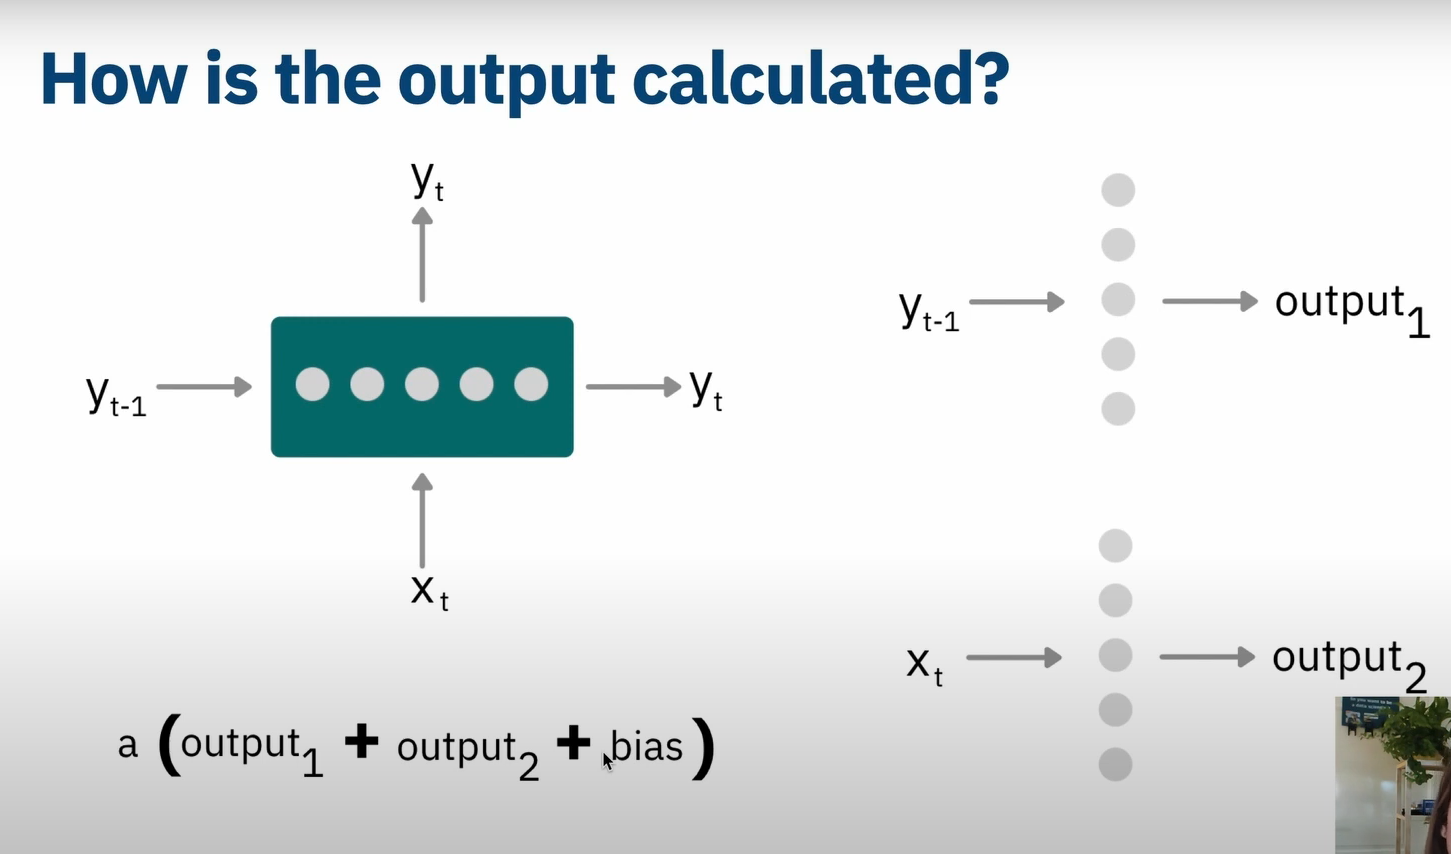

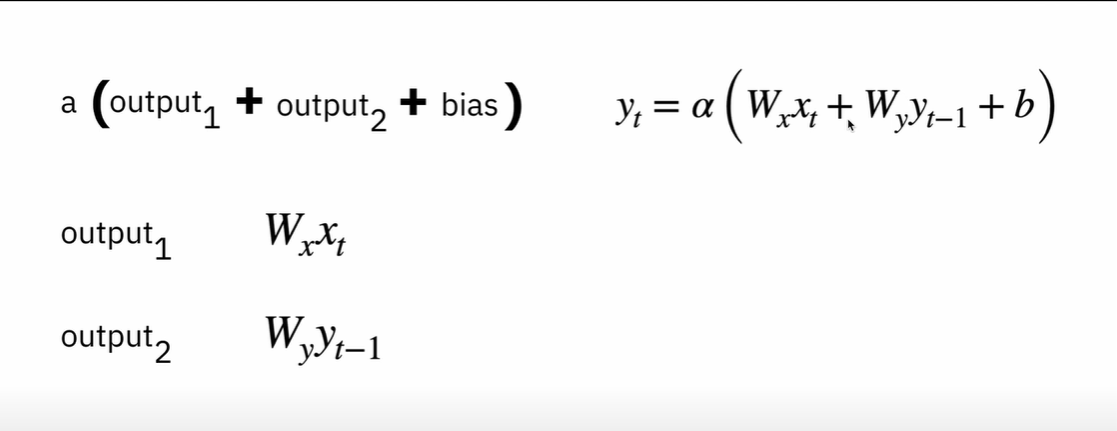

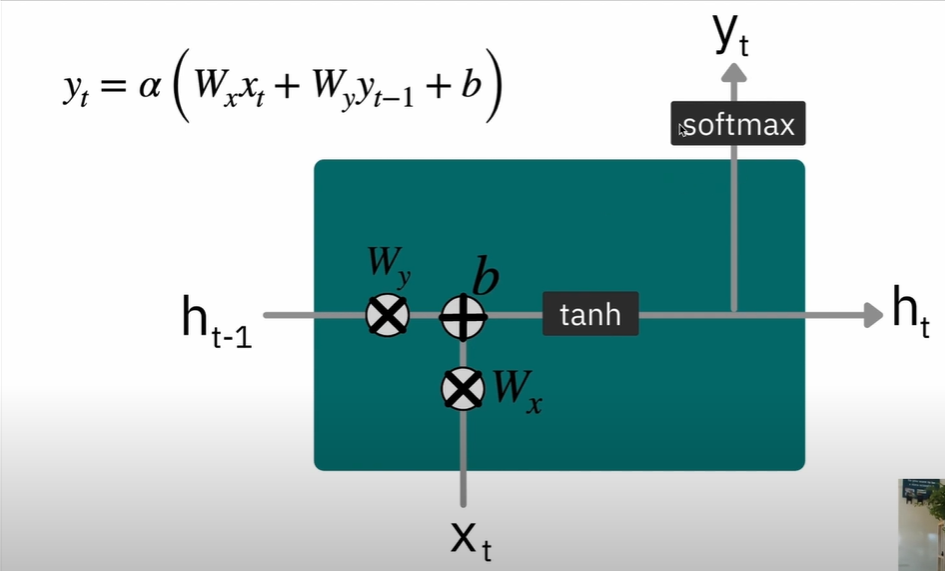

**Backpropagation Through Time (BPTT)**

BPTT is a key algorithm in training RNNs. It involves the following steps:

**Forward Pass :** The input sequence is processed as described above.

**Error Calculation :** The error between the predicted output and the target is calculated.

**Backward Pass :**The error is propagated backward through the network, starting from the final time step.
The gradients of the loss function with respect to the weights and biases at each time step are computed.
The gradients are accumulated over time to obtain the total gradient for each weight and bias.

**Weight Update :** The weights and biases are updated using the accumulated gradients.

In [ ]:
!pip install yfinance

In [ ]:
!pip install --upgrade statsmodels

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error

In [ ]:
google_data=yf.download('GOOGL',start='2020-07-01',end='2024-07-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,70.958504,72.424004,70.709000,72.099998,72.017342,42182000
2020-07-02,72.592003,74.426003,72.553497,73.496498,73.412247,57218000
2020-07-06,74.407501,75.500000,73.848999,74.982498,74.896538,44712000
2020-07-07,74.806503,76.066002,74.485001,74.496002,74.410599,42364000
2020-07-08,75.040001,75.558502,74.614998,75.180000,75.093819,31766000


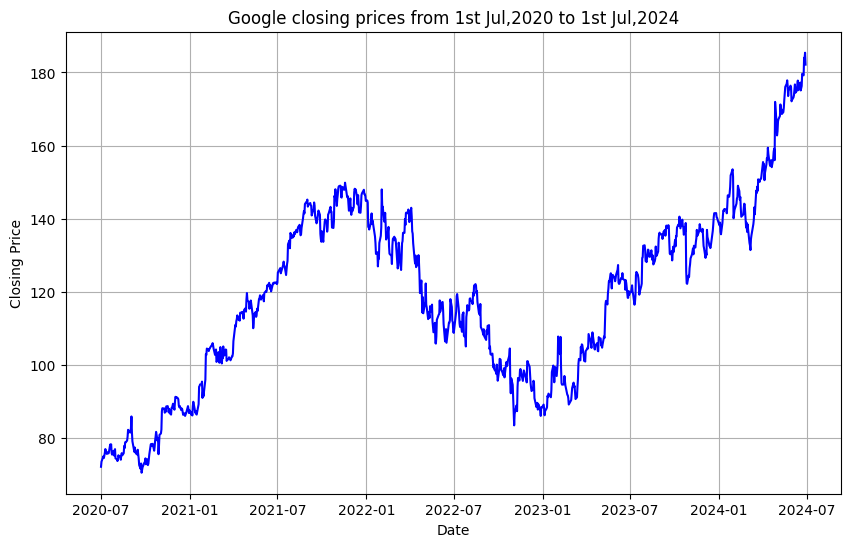

In [ ]:
plt.figure(figsize=(10,6))  #Sets the size of the plot
plt.plot(google_data['Close'],color='blue')
plt.xlabel('Date')
plt.ylabel("Closing Price")
plt.title("Google closing prices from 1st Jul,2020 to 1st Jul,2024")
plt.grid()
plt.show()

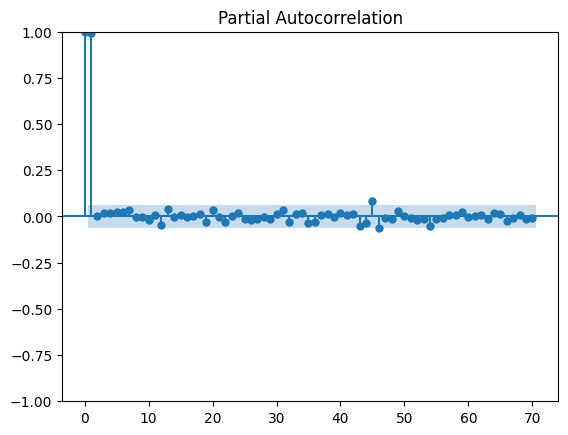

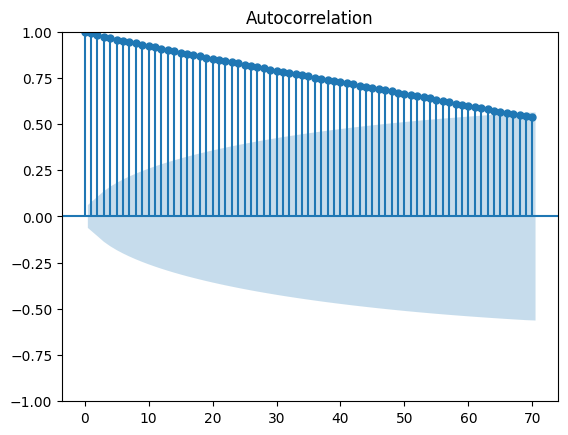

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf=plot_pacf(google_data['Close'],lags=70)
acf=plot_acf(google_data['Close'],lags=70)

In [ ]:
train=google_data['Close'][:len(google_data)-30]
test=google_data['Close'][len(google_data)-30:]
val=train[len(train)-30:]

In [ ]:
train = train.values.reshape(-1, len(train), 1)
train_target = train[:, 1:, 0]

In [ ]:
val = val.values.reshape(-1, len(val), 1)
val_target = val[:, 1:, 0]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,SimpleRNN, Dense,Dropout,BatchNormalization

model = Sequential([
    Input(shape=(len(train),1)),                          #Shape will be as such (sequence_size,input_size)

    SimpleRNN(units=100, return_sequences=True,activation='relu'),   #Default activation function for RNN layer is tanh but we could specify otherwise.
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=100,return_sequences=True,activation='relu'),                          # 100 is the number of neurons in the RNN layer.
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=100,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),

    Dense(units=1)                                #This acts as the output value and since we want the predicted value for the price we will keep 1 neuron in the output layer
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 100)              │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 1, 100)              │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 100)              │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,701 (201.96 KB)

 Trainable params: 51,101 (199.61 KB)

 Non-trainable params: 600 (2.34 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),loss='mean_absolute_error')
history=model.fit(train,train_target,epochs=1000, batch_size=32,validation_data=(val,val_target),callbacks=[early_stopping])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 117.0819 - val_loss: 148.1329
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step - loss: 116.6291 - val_loss: 148.9236
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - loss: 116.1282 - val_loss: 149.1550
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 115.5368 - val_loss: 148.8578
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step - loss: 114.8795 - val_loss: 148.5031
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 114.1717 - val_loss: 148.1026
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - loss: 113.4225 - val_loss: 147.5265
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - loss: 112.6377 - val_loss: 146.8698
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - loss: 111.8209 - val_loss: 146.1978
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step - loss: 110.9746 - val_loss: 145.4017
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step - loss: 110.1005 - val_loss: 144.5451
Epoch 12/

In [ ]:
pred=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


In [ ]:
print(pred)

[[203.40437]
 [204.21567]
 [204.58678]
 [204.98813]
 [204.35374]
 [203.12712]
 [203.75392]
 [204.36238]
 [204.14664]
 [202.49335]
 [202.66502]
 [202.95988]
 [203.23277]
 [203.9352 ]
 [204.50479]
 [203.52524]
 [203.76256]
 [204.45734]
 [204.9622 ]
 [203.82726]
 [204.53067]
 [204.72487]
 [203.79707]
 [204.31923]
 [205.75626]
 [205.57936]
 [207.65497]
 [207.59024]
 [208.25049]
 [206.84366]]


In [ ]:
print(test)

Date
2024-05-16    174.179993
2024-05-17    176.059998
2024-05-20    176.919998
2024-05-21    177.850006
2024-05-22    176.380005
2024-05-23    173.550003
2024-05-24    174.990005
2024-05-28    176.399994
2024-05-29    175.899994
2024-05-30    172.110001
2024-05-31    172.500000
2024-06-03    173.169998
2024-06-04    173.789993
2024-06-05    175.410004
2024-06-06    176.729996
2024-06-07    174.460007
2024-06-10    175.009995
2024-06-11    176.619995
2024-06-12    177.789993
2024-06-13    175.160004
2024-06-14    176.789993
2024-06-17    177.240005
2024-06-18    175.089996
2024-06-20    176.300003
2024-06-21    179.630005
2024-06-24    179.220001
2024-06-25    184.029999
2024-06-26    183.880005
2024-06-27    185.410004
2024-06-28    182.149994
Name: Close, dtype: float64


In [ ]:
pred_df = pd.DataFrame(pred, index=test.index, columns=['Predicted'])
combined_df = pd.concat([test, pred_df], axis=1)

combined_df.head()

,Close,Predicted
Date,,
2024-05-16,174.179993,203.404373
2024-05-17,176.059998,204.215668
2024-05-20,176.919998,204.586777
2024-05-21,177.850006,204.988129
2024-05-22,176.380005,204.353745


In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((combined_df['Close']-combined_df['Predicted'])/test))*100}")

Mean absolute percent error : 15.700893838200225


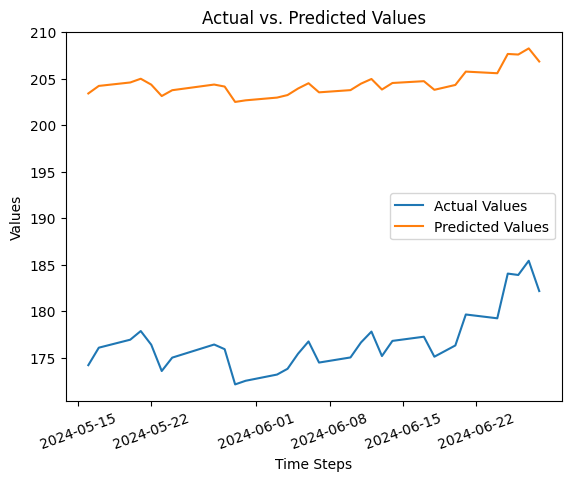

In [ ]:
plt.plot(combined_df['Close'], label='Actual Values')
plt.plot(combined_df['Predicted'], label='Predicted Values')
plt.legend()
plt.xlabel('Time Steps')
plt.xticks(rotation=20)
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.show()

**Vanishing and exploding gradient problem**

source : https://medium.com/metaor-artificial-intelligence/the-exploding-and-vanishing-gradients-problem-in-time-series-6b87d558d22

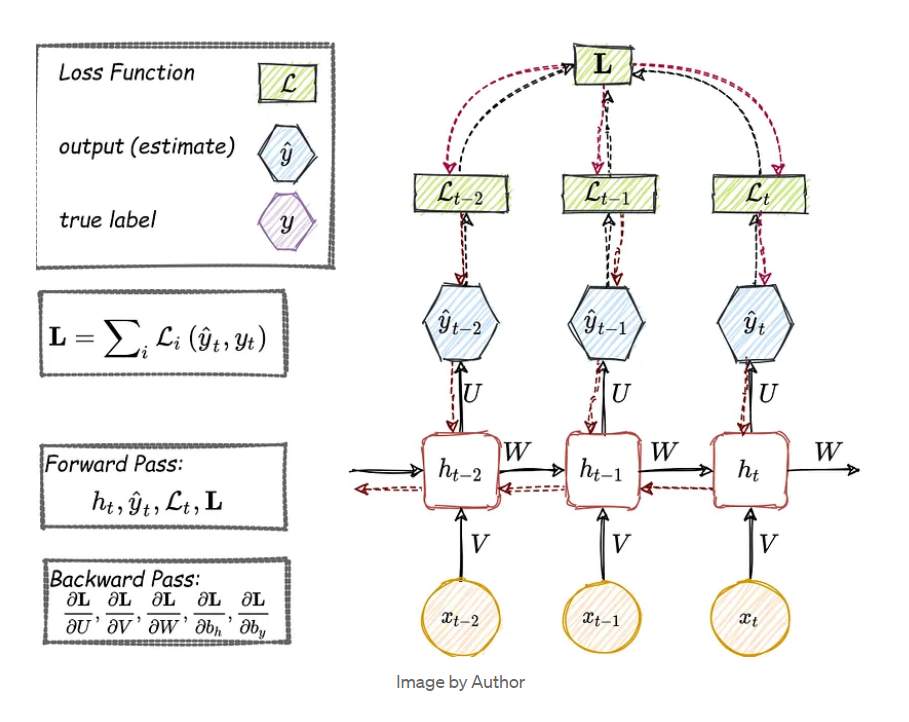

To find out the weights for the input as well as that of the hidden state, we compute the gradient of the loss with respect to each of the input and hidden state.The gradient will be a partial derivative in this case since the loss is dependent on two different weight matrices rather than one in the usual feed forward networks. Thus the formula for the gradient of the hidden state is as follows :

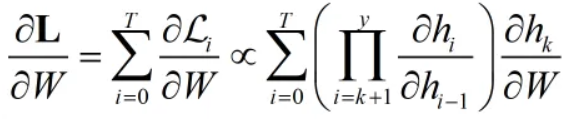

When the partial derivative of the hidden state wrt the hidden state at the previous time instant, the fluctuation of this value causes the fluctuation of the gradient, causing the usage of incorrect weights.

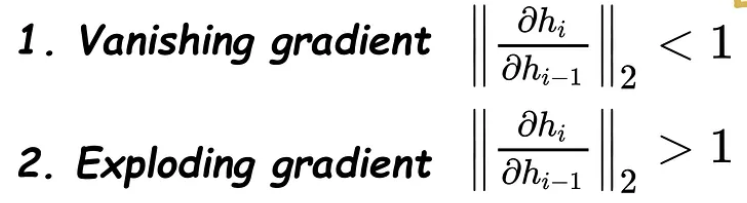

In the first case, the term goes to zero exponentially fast, which makes it difficult to learn some long-period dependencies. This problem is called the vanishing gradient. In the second case, the term goes to infinity exponentially fast, and its value becomes a NaN due to the unstable process. This problem is called the exploding gradient.

# Long-Short Term Memory (LSTM)

It is an improved version of RNNs which is able to resolves the problem of vanishing and exploding gradient in RNNs.

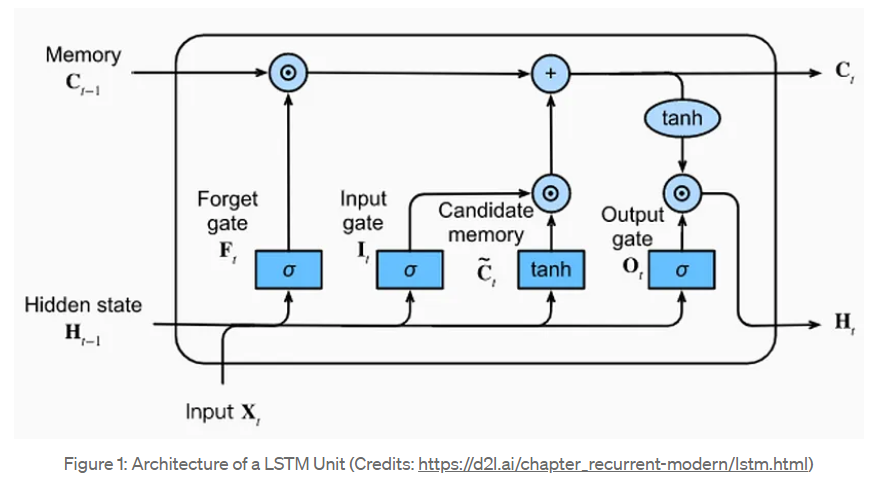

**Understanding the LSTM model**

The key difference between RNN and LSTM is that there is a cell state that acts as a long term memory which doesn't get modified very often.

**Gates :** There are three gates used in a LSTM, the main function of the gates is to create selector vector. The selector vector is a vector that hass values of either 0 or 1 or values close to these extreme values, thus the activation functionn used in gates is the sigmoid function. The selector vector is used to multiply element by element. If the selector vector is 0 then after multiplying the output will be 0 thus the information for that element will be completely eliminated. If the selector vector is 1 then the information of that element will be retained. The three gates in LSTM are :

* **Forget Gate :** The first activity done in an LSTM is to filter out what data is to be removed from the cell state coming from the previous time instant. The forget gate decides what is to be removed based on the current input and the hidden state of the previous time instance.

* **Input gate and Candidate memory :** After the memory is removed from the cell state, a new one is added with the help of the input gate and the candidate memory. The input for this gate is the concatination of the input at the new time instance as well as the hidden state from the previous time instance. The candidate memory is responsible for the generation of a candidate vector: a vector of information that is candidate to be added to the cell state.The input gate is responsible for the generation of a selector vector which will be multiplied element by element with the candidate vector.The selector vector and the candidate vector are multiplied with each other, element by element.The result of the multiplication between the candidate vector and the selector vector is added to the cell state vector. This adds new information to the cell state.

* **Output gate :** The output gate determines the value of the hidden state outputted by the LSTM. Output generation also works with a multiplication between a selector vector and a candidate vector. In this case, however, the candidate vector is not generated by a neural network, but it is obtained simply by using the hyperbolic tangent function on the cell state vector. This step makes the vector values of the cell state normalized within a range of -1 to 1.






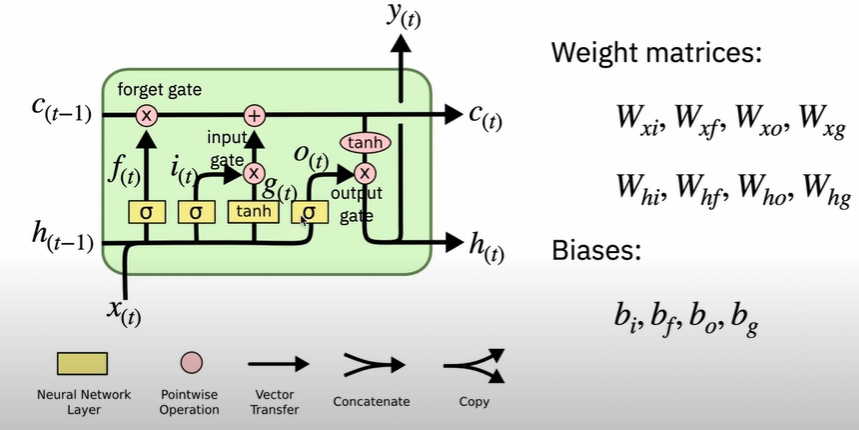

In [ ]:
train=google_data['Close'][:len(google_data)-30]
test=google_data['Close'][len(google_data)-30:]
val=train[len(train)-30:]

sequence_length=30

def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])  # The sequence of prices
        y.append(data[i+sequence_length])    # The next price to be predicted
    x = np.array(x).reshape(-1, sequence_length, 1)
    y = np.array(y)
    return x, y

x_train, y_train = create_sequences(train, sequence_length)

<ipython-input-34-741ec4b89185>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i+sequence_length])    # The next price to be predicted


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding,Dense,Dropout,BatchNormalization,Bidirectional,LSTM,Input

model = Sequential([
    Input(shape=(sequence_length, 1)),

    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.4),
    BatchNormalization(),

    Bidirectional(LSTM(256,return_sequences=True)),
    Dropout(0.4),
    BatchNormalization(),

    Bidirectional(LSTM(256,return_sequences=True)),
    Dropout(0.4),
    BatchNormalization(),

    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.4),
    BatchNormalization(),


    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(units=1)                                #This acts as the output value and since we want the predicted value for the price we will keep 1 neuron in the output layer
])
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_23 (Bidirectional)     │ (None, 30, 256)             │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_81 (Dropout)                 │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_81               │ (None, 30, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_24 (Bidirectional)     │ (None, 30, 512)             │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_82 (Dropout)                 │ (None, 30, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_82               │ (None, 30, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_25 (Bidirectional)     │ (None, 30, 512)             │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_83 (Dropout)                 │ (None, 30, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_83               │ (None, 30, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_26 (Bidirectional)     │ (None, 30, 256)             │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_84 (Dropout)                 │ (None, 30, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 30, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 30, 128)             │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_85 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 30, 128)             │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 30, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_86 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,471,745 (13.24 MB)

 Trainable params: 3,468,161 (13.23 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.003),loss='mean_absolute_error')
history=model.fit(x_train,y_train,epochs=20, batch_size=32)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - loss: 125.9453
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 114.4102
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 109.0425
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 98.7872
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - loss: 89.1074
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 74.3614
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 59.2460
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 43.7306
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 28.9774
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 22.3788
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 21.4416
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 20.9596
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 21.4343
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 21.5782
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 21.2815
E

In [ ]:
pred=model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
pred=pred.reshape(pred.shape[0], -1)

print(pred)

[[119.006645]
 [119.00655 ]
 [119.006516]
 [119.00647 ]
 [119.00654 ]
 [119.006676]
 [119.006615]
 [119.00654 ]
 [119.00656 ]
 [119.00675 ]
 [119.00673 ]
 [119.00669 ]
 [119.006676]
 [119.00658 ]
 [119.00652 ]
 [119.00663 ]
 [119.006615]
 [119.00652 ]
 [119.006485]
 [119.0066  ]
 [119.006516]
 [119.0065  ]
 [119.0066  ]
 [119.00654 ]
 [119.00639 ]
 [119.00641 ]
 [119.00621 ]
 [119.00622 ]
 [119.00618 ]
 [119.00628 ]]


In [ ]:
pred_df = pd.DataFrame(pred, index=test.index, columns=['Predicted'])
combined_df = pd.concat([test, pred_df], axis=1)

combined_df.head()

,Close,Predicted
Date,,
2024-05-16,174.179993,119.006645
2024-05-17,176.059998,119.006554
2024-05-20,176.919998,119.006516
2024-05-21,177.850006,119.006470
2024-05-22,176.380005,119.006538


In [ ]:
print(f"Mean absolute percent error : {np.mean(np.abs((combined_df['Close']-combined_df['Predicted'])/test))*100}")

Mean absolute percent error : 33.44938194464675


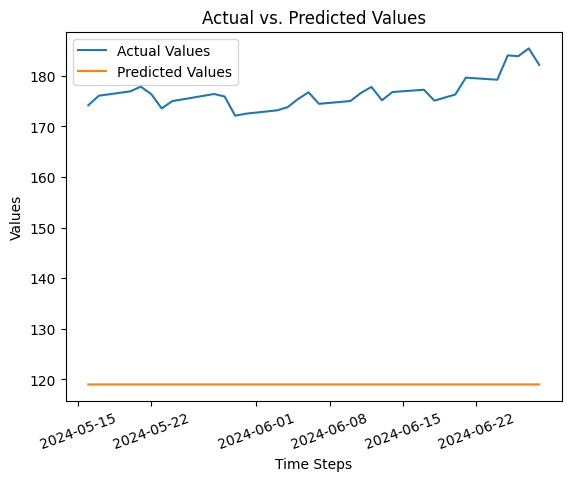

In [ ]:
plt.plot(combined_df['Close'], label='Actual Values')
plt.plot(combined_df['Predicted'], label='Predicted Values')
plt.legend()
plt.xlabel('Time Steps')
plt.xticks(rotation=20)
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.show()